In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import log_loss
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df = pd.read_csv("EDA/data/with_avg_vals.csv")
df.head()

,1_1,1_2,1_3,1_4,1_5,1_6,2_1,2_2,2_3,2_4,...,62_5,62_6,63_1,63_2,63_3,63_4,63_5,63_6,name,task
0,2.148821e-12,1.762882e-12,1.459278e-13,1.587917e-13,8.052632e-14,9.811591e-14,4.880873e-12,3.717614e-12,5.085536e-14,1.059260e-13,...,1.276443e-12,8.376371e-13,2.611143e-12,4.619382e-12,9.115283e-13,4.653725e-13,6.211839e-13,8.285990e-13,chcon_s_100,0
1,1.270260e-12,8.164477e-13,5.903729e-13,3.056763e-13,1.406329e-13,1.300234e-13,1.355080e-12,1.772045e-12,3.034272e-13,5.719425e-13,...,8.724144e-13,1.631172e-12,3.973207e-12,3.763169e-12,1.845015e-12,1.511330e-12,1.079865e-12,2.844522e-12,chcon_s_100,0
2,7.709517e-13,1.717117e-13,3.039963e-13,1.663584e-13,1.726942e-13,1.575523e-14,8.081481e-13,3.148841e-13,2.274227e-13,2.398548e-13,...,4.848598e-13,2.998910e-12,7.980503e-13,1.972731e-12,1.151927e-12,1.502789e-12,1.407080e-12,4.519942e-12,chcon_s_100,0
3,2.800220e-12,3.611335e-13,9.828645e-13,3.723583e-13,1.130286e-13,1.024523e-13,6.833368e-12,1.860960e-13,9.452324e-13,1.900433e-13,...,1.179424e-12,1.033002e-12,2.197372e-12,7.087539e-13,8.981474e-13,9.161498e-13,6.247119e-13,1.532856e-12,chcon_s_100,0
4,9.507999e-13,4.833313e-13,1.694255e-12,1.434799e-13,1.543624e-13,1.756470e-14,2.416072e-12,9.628125e-13,2.960569e-12,1.021592e-13,...,4.516402e-13,2.892556e-13,4.063033e-12,1.206668e-12,1.582814e-12,6.090663e-13,1.444978e-12,2.585149e-12,chcon_s_100,0


In [5]:
X = df.iloc[:, :-2].values
y = df.task

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
def sigmoid(y_pred):
    return 1.0 / (1.0 + np.exp(-y_pred))

In [12]:
def log_loss_results(clf, X, y_true):
    return [log_loss(y_true=y_true, y_pred=sigmoid(y_pred)) for y_pred in clf.staged_decision_function(X)]

In [21]:
def plot_loss(learning_rate, train_loss, test_loss):
    plt.figure(figsize=(14, 7))
    plt.plot(train_loss, "g", linewidth=2.5)
    plt.plot(test_loss, "b", linewidth=2.5)
    plt.legend(["train", "test"])
    plt.savefig(fname='graphics/learning_rate_' + str(learning_rate).replace('.', '_') + '.jpg')
    plt.show()

In [7]:
clf = GradientBoostingClassifier(n_estimators=200, verbose=1, learning_rate=0.1).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3729            8.73m
         2           1.3688            8.71m
         3           1.3643            8.68m
         4           1.3610            8.64m
         5           1.3569            8.60m
         6           1.3537            8.55m
         7           1.3497            8.48m
         8           1.3459            8.45m
         9           1.3424            8.40m
        10           1.3385            8.36m
        20           1.3094            7.93m
        30           1.2777            7.49m
        40           1.2505            7.05m
        50           1.2270            6.62m
        60           1.2037            6.17m
        70           1.1778            5.73m
        80           1.1547            5.29m
        90           1.1320            4.85m
       100           1.1090            4.40m
       200           0.9062            0.00s


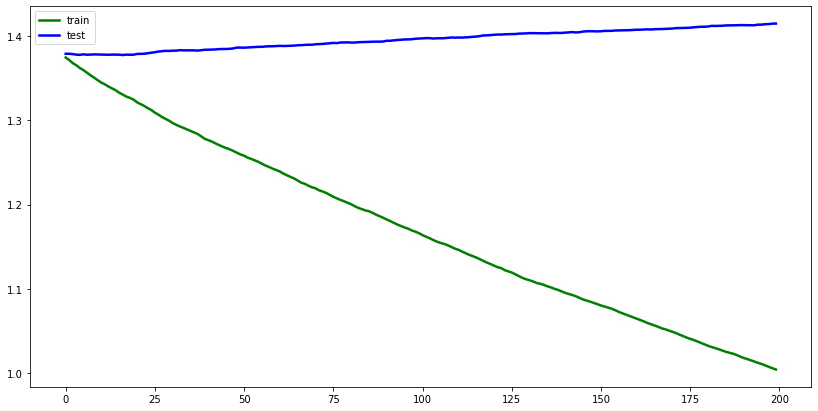

In [22]:
train_loss = log_loss_results(clf, X_train, y_train)
test_loss = log_loss_results(clf, X_test, y_test)
plot_loss(0.1, train_loss, test_loss)

In [26]:
min_loss_results = {}
min_loss_val = np.min(test_loss)
min_loss_index = test_loss.index(min_loss_val) + 1
min_loss_results[0.1] = min_loss_val, min_loss_index
print(f"Min loss {min_loss_val:.3f} at n_estimators={min_loss_index}\n")

Min loss 1.377 at n_estimators=17



In [29]:
clf.score(X_test, y_test)

0.2550493189290747

In [8]:
clf.feature_importances_

array([0.00457737, 0.00181152, 0.00015241, 0.00352047, 0.00131963,
       0.00218548, 0.00080155, 0.00099319, 0.00338938, 0.0033047 ,
       0.00328249, 0.00287907, 0.00119779, 0.00481761, 0.00038168,
       0.00241157, 0.00445993, 0.00196793, 0.0013318 , 0.00172714,
       0.00271944, 0.00259775, 0.00418789, 0.00344587, 0.00599171,
       0.00117481, 0.00220784, 0.0014384 , 0.00360268, 0.00049008,
       0.00392519, 0.00278784, 0.00204686, 0.00201492, 0.00143683,
       0.0051699 , 0.00194809, 0.00169617, 0.00108268, 0.00197055,
       0.00245644, 0.00212716, 0.00313454, 0.00221582, 0.00199738,
       0.00354231, 0.00314936, 0.00190196, 0.00342   , 0.00187785,
       0.00577393, 0.00394733, 0.00157661, 0.00504909, 0.00155199,
       0.00361486, 0.00084379, 0.00261639, 0.00176871, 0.00222106,
       0.00283885, 0.00217205, 0.00276209, 0.00308341, 0.00166378,
       0.00204792, 0.00154462, 0.00457481, 0.00272791, 0.00199536,
       0.00355834, 0.00164958, 0.00393777, 0.0012312 , 0.00172

In [9]:
select_model = SelectFromModel(clf, prefit=True)
X_new = select_model.transform(X_train)

In [10]:
X_new.shape

(6385, 178)

In [27]:
clf_new = GradientBoostingClassifier(n_estimators=200, verbose=1, learning_rate=0.1).fit(X_new, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3729            3.91m
         2           1.3689            3.90m
         3           1.3646            3.89m
         4           1.3608            3.87m
         5           1.3570            3.85m
         6           1.3533            3.83m
         7           1.3491            3.81m
         8           1.3459            3.80m
         9           1.3425            3.78m
        10           1.3383            3.76m
        20           1.3091            3.57m
        30           1.2837            3.37m
        40           1.2576            3.17m
        50           1.2312            2.97m
        60           1.2085            2.77m
        70           1.1865            2.57m
        80           1.1640            2.37m
        90           1.1402            2.17m
       100           1.1184            1.97m
       200           0.9341            0.00s


In [46]:
feature_idx = select_model.get_support()
feature_names = df.iloc[:, :-2].columns[feature_idx]
feature_names

Index(['1_1', '1_4', '2_3', '2_4', '2_5', '2_6', '3_2', '3_5', '4_3', '4_5',
       ...
       '60_5', '61_1', '61_3', '61_5', '61_6', '62_4', '62_5', '63_1', '63_3',
       '63_4'],
      dtype='object', length=178)

In [47]:
feature_indexes = df.iloc[:, :-2].columns.get_indexer(feature_names)

In [50]:
X_test_df = pd.DataFrame(X_test)
X_test_df

,0,1,2,3,4,5,6,7,8,9,...,368,369,370,371,372,373,374,375,376,377
0,0.000590,0.007615,0.000356,0.003204,0.001216,0.002296,0.005769,0.007275,0.000796,0.000615,...,0.000536,0.000807,0.001179,0.002199,0.002980,0.007095,0.005278,0.008506,0.004965,0.011229
1,0.004308,0.010159,0.015902,0.006352,0.003856,0.004097,0.010184,0.014572,0.007716,0.014586,...,0.080073,0.019441,0.009194,0.005247,0.003637,0.017883,0.047380,0.031013,0.020122,0.015694
2,0.027651,0.009097,0.028299,0.074006,0.076895,0.676641,0.007683,0.029700,0.026407,0.079865,...,0.035989,0.066169,0.023957,0.027364,0.009128,0.041825,0.011521,0.176578,0.023807,0.102192
3,0.010117,0.034262,0.041704,0.032790,0.011673,0.003536,0.027911,0.026673,0.069196,0.186205,...,0.097260,0.154823,0.018348,0.010640,0.006032,0.047708,0.011627,0.010694,0.008347,0.004591
4,0.000279,0.003078,0.012379,0.001425,0.005124,0.005984,0.004249,0.006635,0.016106,0.047916,...,0.010151,0.050307,0.000809,0.018356,0.004129,0.004536,0.027045,0.044222,0.022997,0.161554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,0.000123,0.011491,0.004795,0.017941,0.013569,0.016420,0.000280,0.026979,0.002394,0.070567,...,0.008511,0.028876,0.008233,0.015016,0.002211,0.011478,0.017616,0.058131,0.043361,0.017337
4254,0.002039,0.002437,0.008105,0.009673,0.001673,0.002163,0.009051,0.011091,0.002219,0.194163,...,0.021362,0.012087,0.003356,0.002353,0.004031,0.010821,0.002938,0.025449,0.018193,0.005259
4255,0.002035,0.005320,0.011165,0.008155,0.000968,0.000514,0.006060,0.011405,0.014478,0.072947,...,0.027860,0.010411,0.013903,0.005175,0.001365,0.042927,0.005436,0.017608,0.026903,0.008871
4256,0.035392,0.010780,0.030328,0.003151,0.005030,0.010123,0.164862,0.019048,0.056349,0.029537,...,0.186961,0.038893,0.008017,0.002553,0.019842,0.013693,0.038128,0.100617,0.048727,0.011148


In [51]:
X_test_new = X_test_df[feature_indexes]
X_test_new.shape

(4258, 178)

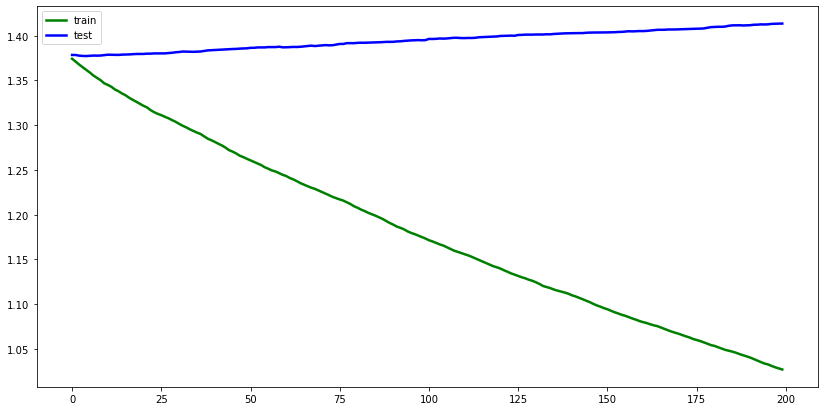

In [53]:
train_loss = log_loss_results(clf_new, X_new, y_train)
test_loss = log_loss_results(clf_new, X_test_new, y_test)
plot_loss(0.1, train_loss, test_loss)

In [54]:
min_loss_results = {}
min_loss_val = np.min(test_loss)
min_loss_index = test_loss.index(min_loss_val) + 1
min_loss_results[0.1] = min_loss_val, min_loss_index
print(f"Min loss {min_loss_val:.3f} at n_estimators={min_loss_index}\n")

Min loss 1.377 at n_estimators=5



In [56]:
clf_new.score(X_test_new, y_test)

0.2618600281822452